In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


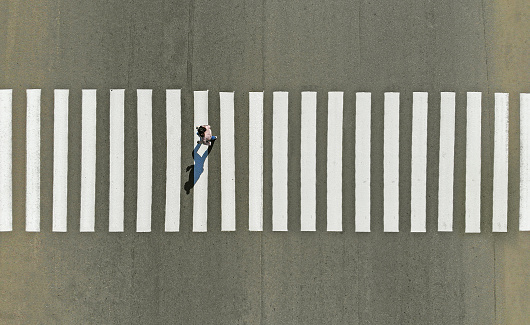

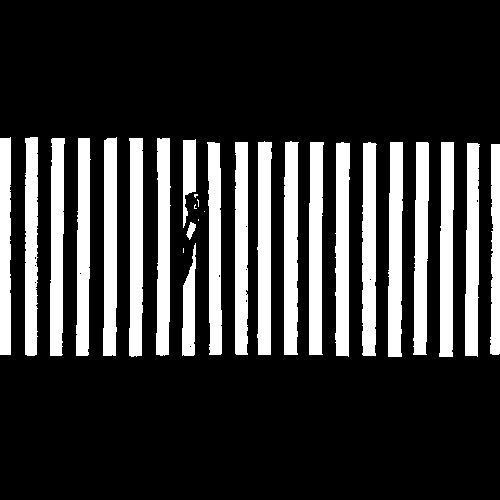

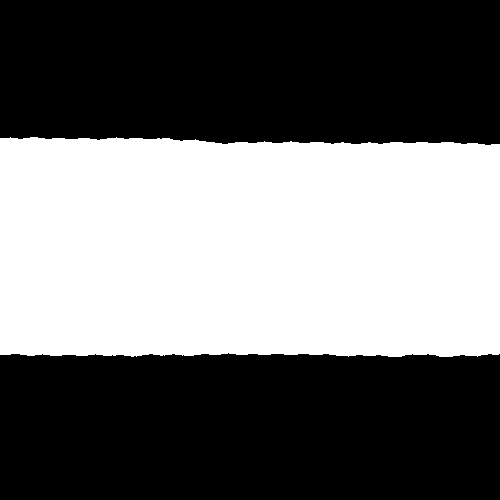

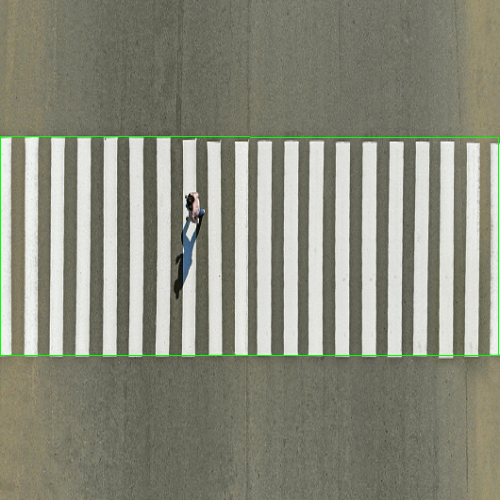

Zebra crossing found


In [9]:
#/content/drive/MyDrive/Capstone Codes/zebra.jpeg
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/Capstone Codes/zzebra.jpeg', -1)
cv2_imshow(image)
paper = cv2.resize(image, (500,500))
#cv2_imshow(paper)
ret, thresh_gray = cv2.threshold(cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY), 200, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh_gray)
contours, hier = cv2.findContours(thresh_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Erase small contours, and contours which small aspect ratio (close to a square)
for c in contours:
    area = cv2.contourArea(c)

    # Fill very small contours with zero (erase small contours).
    if area < 50:
        cv2.fillPoly(thresh_gray, pts=[c], color=0)
        continue

    # https://stackoverflow.com/questions/52247821/find-width-and-height-of-rotatedrect
    rect = cv2.minAreaRect(c)
    (x, y), (w, h), angle = rect
    aspect_ratio = max(w, h) / min(w, h)

    # Assume zebra line must be long and narrow (long part must be at lease 1.5 times the narrow part).
    if (aspect_ratio < 1.5):
        cv2.fillPoly(thresh_gray, pts=[c], color=0)
        continue


# Use "close" morphological operation to close the gaps between contours
# https://stackoverflow.com/questions/18339988/implementing-imcloseim-se-in-opencv
thresh_gray = cv2.morphologyEx(thresh_gray, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (51,51)));
cv2_imshow(thresh_gray)
# Find contours in thresh_gray after closing the gaps
contours, hier = cv2.findContours(thresh_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for c in contours:
    area = cv2.contourArea(c)

    # Small contours are ignored.
    if area < 10000:
        cv2.fillPoly(thresh_gray, pts=[c], color=0)
        continue

    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    cv2.drawContours(paper, [box], 0, (0, 255, 0),1)
    cv2_imshow(paper)
cv2.imwrite('paper.jpg', paper)
print("Zebra crossing found")

cv2.waitKey(0)
cv2.destroyAllWindows()